In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading datasets

In [3]:
X,y = load_breast_cancer(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fitting the data

In [5]:
lr = LogisticRegression()

In [6]:
lr.fit(X_train, y_train)

LogisticRegression()

# Making predictions

In [7]:
scores = lr.predict_proba(X_test)[:,1]

# Functions for evaluating fp,tp and accuracy

In [8]:
def eval_fp_tp(actual, predicted):
    fp = np.logical_and(predicted, np.logical_not(actual))
    tp = np.logical_and(predicted, actual)
    return (sum(fp), sum(tp))

In [9]:
def eval_accuracy(actual, predicted):
    tp = np.logical_and(predicted, actual)
    tn = np.logical_and(np.logical_not(predicted), np.logical_not(actual))
    return (sum(tp) + sum(tn))/len(actual)

# fp,tp and accuracy evaluations for different thresholds

Given the scores for the test cases, we might want to find the best possible threshold for classification, i.e., the real value $t$ such that `scores >` $t$ gives the best classifiation of the examples. 

Let us then start to consider 100 possible thresholds in the range $[0,1]$:

In [14]:
thresholds = [i/100.0 for i in range(0,100)]

and compute the tp, fp, and accuracy values of the labelings obtained by comparing the scores with those thresholds.

In [17]:
actual = y_test
performances = []
fps, tps = [], []
for t in thresholds:
    predicted = scores > t
    fp, tp = eval_fp_tp(actual, predicted)
    fps.append(fp)
    tps.append(tp)

    performances.append((eval_accuracy(actual, predicted), t, fp, tp))

performances = np.array(performances)

# Plotting

Let us then start plotting the coverage plot for the obtained classifications.

[&lt;matplotlib.lines.Line2D at 0x133707b20&gt;]

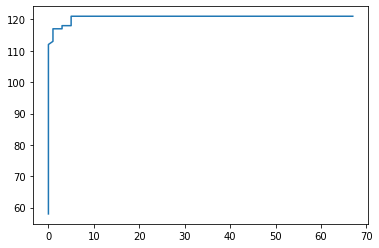

In [18]:
plt.plot(fps, tps)


# Checking performances for threshold 0.5

The predict_proba method we used to get the score returns the probability that examples belong to the positive class. Usually the positive class is then predicted as score > 0.5 (since in this case it is the one the largest likelihood).

Let's then see where this classifier (i.e., the one obtained setting the threshold to 0.5) lays in the coverage plot and if there are better options.

**note**: since we saved interesting stats in the `performances` array, we can retrieve the fp, tp position of the classifier we get by setting the thresholds to 0.5, by finding the position of the row we are interested using the expression: `performances[:,1] == 0.5` and then using the resulting boolean vector to retrieve the correct row of the matrix: `performances[performances[:,1] == 0.5]`.
```

[&lt;matplotlib.lines.Line2D at 0x13318b2e0&gt;]

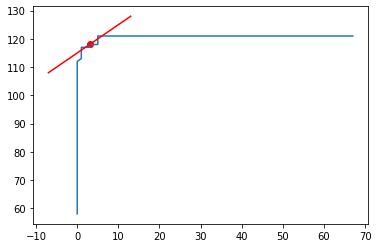

In [27]:
plt.plot(fps, tps)
accuracy, threshold, fp, tp = performances[performances[:,1] == 0.5][0]
plt.scatter(fp,tp,color='red')
plt.plot([fp-10,fp+10],[tp-10,tp+10], color="red")

As it is shown by the red dot and the red line, threshold 0.5 is a good one, but apparently two other points can reach a better classification.

Let us see where these point lay in the plot and what is their accuracy.

In [39]:
perf05 = performances[performances[:, 1] == 0.5][0,0] # the subscription returns a matrix with a single row, but still two dimensions, we need to get the element in the first position of that matrix...

performances[performances[:,0] > perf05]

array([[  0.97340426,   0.17      ,   5.        , 121.        ],
       [  0.97340426,   0.18      ,   5.        , 121.        ],
       [  0.97340426,   0.19      ,   5.        , 121.        ],
       [  0.97340426,   0.63      ,   1.        , 117.        ],
       [  0.97340426,   0.64      ,   1.        , 117.        ],
       [  0.97340426,   0.65      ,   1.        , 117.        ],
       [  0.97340426,   0.66      ,   1.        , 117.        ]])

The two points that we are looking for are then in position (5,121) and (1,117)

[&lt;matplotlib.lines.Line2D at 0x13448be20&gt;]

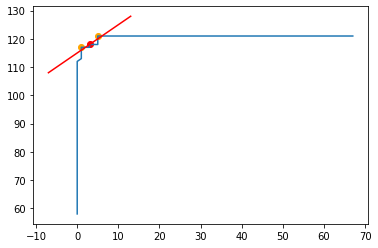

In [46]:
plt.plot(fps, tps)
fp, tp = eval_fp_tp(actual, scores > 0.5)
plt.scatter(fp,tp, color="red")
plt.scatter(5,121, color="orange")
plt.scatter(1,117, color="orange")
plt.plot([fp-10,fp+10],[tp-10,tp+10], color="red")

These two points (that we found by looking only to the accuracies) are indeed the two points that the plot show having a better accuracy. 